<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/03.08-Tank-Volume-Expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liquid volume in partially filled horizontal tanks

Tanks are often used in storing chemicals. Often, only the liquid height from a level indicator is known. This means you need a method of calculating the liquid volume based on the liquid height and the tank dimensions.

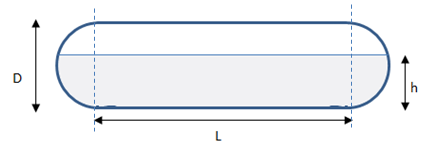

In [33]:
def horizontal_tank_volume(args):

  # Source: https://excelcalculations.blogspot.com/2012/09/volume-partially-filled-tanks.html
  from math import pi, acos

  h = args[0]
  D = args[1]
  L = args[2]
  head = args[3]

  k_head = {'flat': 0.0, 'dished': 0.215483, 'elliptical': pi/6, 'hemispherical': pi/3}

  V_head = k_head[head]*h**2*(1.5*D - h)

  V_cyl = ((D/2)**2*acos((D/2 - h)/(D/2)) - (D/2 - h)*(D*h - h**2)**0.5)*L

  V_tank = V_cyl + 2*V_head

  return V_tank

In [76]:
k_head = {'flat': 0.0, 'dished': 0.215483, 'elliptical': pi/6, 'hemispherical': pi/3}
for kk in k_head.keys():
  print(f"V = {horizontal_tank_volume((0.4, 0.5, 1.5, kk)):.6f} ({kk})")

V = 0.252590 (flat)
V = 0.276724 (dished)
V = 0.311233 (elliptical)
V = 0.369877 (hemispherical)


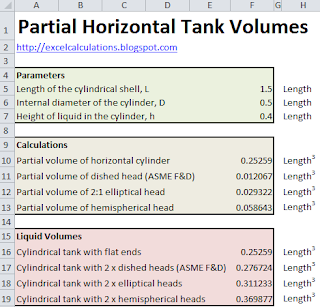

## Derivatives of the horizontal tank volume expressions

In [78]:
from sympy import *

In [96]:
h, D, L, V_flat, V_head, k, V_d, V_e, V_h = symbols('h D L V_flat V_head k V_d V_e V_h')

## Flat ends expressions

In [80]:
V_flat_ = Eq(V_flat, ((D/2)**2*acos((D/2 - h)/(D/2)) - (D/2 - h)*(D*h - h**2)**0.5)*L)
V_flat_

Eq(V_flat, L*(D**2*acos(2*(D/2 - h)/D)/4 - (D/2 - h)*(D*h - h**2)**0.5))

In [81]:
dV_flat_ = Eq(Derivative(V_flat, (h,1)), Derivative(((D/2)**2*acos((D/2 - h)/(D/2)) - (D/2 - h)*(D*h - h**2)**0.5)*L, (h,1)).simplify())
dV_flat_

Eq(Derivative(V_flat, h), L*(2*D/sqrt(1 - (D - 2*h)**2/D**2) + 4*(h*(D - h))**0.5 + 2*(h*(D - h))**0.5*(-D + 2*h)*(0.5*D - 1.0*h)/(h*(D - h)))/4)

## Head ends expressions

In [82]:
V_head_ = Eq(V_head, k*h**2*(1.5*D - h))
V_head_

Eq(V_head, h**2*k*(1.5*D - h))

In [83]:
dV_head_ = Eq(Derivative(V_head, (h,1)), Derivative(k*h**2*(1.5*D - h), (h,1)).simplify())
dV_head_

Eq(Derivative(V_head, h), -h**2*k + 2*h*k*(1.5*D - h))

## Dished ends expressions

In [86]:
V_d_ = Eq(V_d, V_flat_.rhs + 2*V_head_.rhs.subs({k:k_head['dished']}))
V_d_

Eq(V_d, L*(D**2*acos(2*(D/2 - h)/D)/4 - (D/2 - h)*(D*h - h**2)**0.5) + 0.430966*h**2*(1.5*D - h))

In [87]:
dV_d_ = Eq(Derivative(V_d, (h,1)), dV_flat_.rhs + 2*dV_head_.rhs.subs({k:k_head['dished']}))
dV_d_

Eq(Derivative(V_d, h), L*(2*D/sqrt(1 - (D - 2*h)**2/D**2) + 4*(h*(D - h))**0.5 + 2*(h*(D - h))**0.5*(-D + 2*h)*(0.5*D - 1.0*h)/(h*(D - h)))/4 - 0.430966*h**2 + 0.861932*h*(1.5*D - h))

## Elliptical ends expressions

In [98]:
V_e_ = Eq(V_e, V_flat_.rhs + 2*V_head_.rhs.subs({k:k_head['elliptical']}))
V_e_

Eq(V_e, L*(D**2*acos(2*(D/2 - h)/D)/4 - (D/2 - h)*(D*h - h**2)**0.5) + pi*h**2*(1.5*D - h)/3)

In [95]:
dV_e_ = Eq(Derivative(V_e, (h,1)), dV_flat_.rhs + 2*dV_head_.rhs.subs({k:k_head['elliptical']}))
dV_e_

Eq(Derivative(V_e, h), L*(2*D/sqrt(1 - (D - 2*h)**2/D**2) + 4*(h*(D - h))**0.5 + 2*(h*(D - h))**0.5*(-D + 2*h)*(0.5*D - 1.0*h)/(h*(D - h)))/4 - pi*h**2/3 + 2*pi*h*(1.5*D - h)/3)

## Hemispherical ends expressions

In [97]:
V_h_ = Eq(V_h, V_flat_.rhs + 2*V_head_.rhs.subs({k:k_head['hemispherical']}))
V_h_

Eq(V_h, L*(D**2*acos(2*(D/2 - h)/D)/4 - (D/2 - h)*(D*h - h**2)**0.5) + 2*pi*h**2*(1.5*D - h)/3)

In [99]:
dV_h_ = Eq(Derivative(V_h, (h,1)), dV_flat_.rhs + 2*dV_head_.rhs.subs({k:k_head['hemispherical']}))
dV_h_

Eq(Derivative(V_h, h), L*(2*D/sqrt(1 - (D - 2*h)**2/D**2) + 4*(h*(D - h))**0.5 + 2*(h*(D - h))**0.5*(-D + 2*h)*(0.5*D - 1.0*h)/(h*(D - h)))/4 - 2*pi*h**2/3 + 4*pi*h*(1.5*D - h)/3)